<center><h1> Laboratorio 5 CC2 </h1></center>
<center><h3> Matías Ramírez Marianetti </h3></center>
<center><h3> 201173506-4 </h3></center>
<center><h3> matias.ramirezm@alumnos.usm.cl </h3></center>


<h2> Introducción </h2>

En este laboratorio se buscará estudiar las técnicas basadas en diferencias finitas, aplicándolas en un problema con tres dimensiones, dos espaciales y una temporal. Se resolverá la ecuación de calor y aplicará en el procesamiento de imágenes.

<h2>Desarrollo y Análisis Resultados</h2>

<h3> Pregunta 1</h3>

Para comenzar se distretizará $u_t = \alpha \Delta u$

esto equivale a:

$u_t = \alpha (u_{xx} + u_{yy})$

Entonces utilizando diferencias finitas se obtendrá lo siguiente:

$u_t = \frac{w_{i,j,t+1} - w_{i,j,t}}{k}$ <br>
$u_{xx} = \frac{w_{i+1,j,k} - 2w_{i,j,k} + w_{i-1,j,k}}{i^{2}}$ <br>
$u_{yy} = \frac{w_{i,j+1,k} - 2w_{i,j,k} + w_{i,j-1,k}}{j^{2}}$

Ahora al unir todo:
$\frac{w_{i,j,t+1} - w_{i,j,t}}{k} = \alpha (\frac{w_{i+1,j,k} - 2w_{i,j,k} + w_{i-1,j,k}}{i^{2}} + \frac{w_{i,j+1,k} - 2w_{i,j,k} + w_{i,j-1,k}}{j^{2}})$

Reemplazando $i$ y $j$ por $h$ realizamos el siguiente cambio $\sigma = \frac{\alpha k}{h^{2}}$, entonces:

$w_{i,j,t+1} - w_{i,j,t} = \sigma (w_{i+1,j,k} - 2w_{i,j,k} + w_{i-1,j,k} + w_{i,j+1,k} - 2w_{i,j,k} + w_{i,j-1,k})$

Ordenando los términos para finalizar queda:

$w_{i,j,k+1} = w_{i,j,k} + \sigma (w_{i+1,j,k} + w_{i-1,j,k} - 4w_{i,j,k} + w_{i,j+1,k} + w_{i,j-1,k})$
$w_{i,j,k+1} = \sigma w_{i+1,j,k} + \sigma w_{i-1,j,k} + (1 - 4\sigma) w_{i,j,k} + \sigma w_{i,j+1,k} + \sigma w_{i,j-1,k})$

Ahora las condiciones de borde en el momento $t=0$, reemplazando en la ecuación $u(x,y,t) = f(x,y)$ serán:

$f(0,y) = 0$ <br>
$f(10,y) = 0$ <br>
$f(x,0) = 0$ <br>
$f(x,10) = 0$

Se sabe que:

$\dfrac{\partial u}{\partial \mathbf{n}} = (u_{x}, u_{y})\cdot n$

Donde el vector normal $n$ variará dependendiendo de la frontera:

$x = 0 \rightarrow n=(-1,0)$ <br>
$x = 10 \rightarrow n=(1,0)$ <br>
$y = 0 \rightarrow n=(0,-1)$ <br>
$y = 10 \rightarrow n=(0,-1)$

Por lo tanto ahora para calcular las condiciones de borde utilizando la ecuación:

$c \cdot u(\Gamma, t) + (1-c)\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) = 0$

Se ordenan los tériminos:

$u(\Gamma, t) = \frac{-(1-c)}{c}\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t)$

Utilizando diferencias finitas:

$w_{i,j,k} = \frac{-(1-c)}{c} (\frac{w_{i+1,j,k}-w_{i,j,k}}{\Delta t}, \frac{w_{i,j+1,k}-w_{i,j,k}}{\Delta t})\cdot n$

Reemplazando $\omega = \frac{-(1-c)}{c \Delta t}$ y reemplazando las normales obtenidas anteriormente se calculan las condiciones de borde:

<ol>
<li> $x = 0 \rightarrow w_{0,j,k} = w_{1,j,k}(\frac{\omega}{\omega - 1})$
<li> $x = 10 \rightarrow w_{n+1,j,k} = w_{n,j,k}(1 - \frac{1}{\omega})$
<li> $y = 0 \rightarrow w_{i,0,k} = w_{0,1,k}(\frac{\omega}{\omega - 1})$
<li> $y = 10 \rightarrow w_{i,n+1,k} = w_{i,n,k}(1 - \frac{1}{\omega})$




<h3> Código resolución </h3>

In [3]:
import numpy as np

def f(x,y):
    return ((x*y)*(x - 10)*(y - 10))/(x + 3)

def matriz_inicial(n):
    
    matriz_inicial = np.zeros((n+1, n+1))
    
    for i in range(n + 1):
        for j in range(n + 1):
            matriz_inicial[i,j] = f(i,j)
    
    return matriz_inicial

def Resolver_Ecuacion_Calor(matriz_inicial, C, alpha, delta_k, delta_h, t):
    matriz_pivote = matriz_inicial
    matriz = np.zeros((len(matriz_inicial),len(matriz_inicial)))
    sigma = (alpha*delta_k)/(delta_h**2)
    omega = (C - 1)/C
    tiempo = t/delta_k
    matrices_totales = np.zeros((int(tiempo) + 1, len(matriz_inicial), len(matriz_inicial)))
    matrices_totales[0] = matriz_inicial
    for k in range(1, int(tiempo) + 1):
        
        #valores interiores
        for i in range(1, len(matriz_inicial)-1):
            for j in range(1, len(matriz_inicial)-1):
                #if(i > 0 and i < (len(matriz_inicial) - 1) and j > 0 and j < (len(matriz_inicial) - 1)):
                matriz[i][j] = sigma*matriz_pivote[i + 1][j] + sigma*matriz_pivote[i - 1][j] + (1 -4*sigma)*matriz_pivote[i][j] + sigma*matriz_pivote[i][j + 1] + sigma*matriz_pivote[i][j - 1]
        
        #valores frontera sin esquina
        for i in range(len(matriz_inicial)):
            for j in range(len(matriz_inicial)):
                if(i == 0 and j != 0 and j != len(matriz_inicial) - 1):
                    matriz[i][j] = matriz[i + 1][j]*(omega/(omega - 1))
                    
                elif(i == len(matriz_inicial) - 1 and j != 0 and j != len(matriz_inicial) - 1):
                    matriz[i][j] = matriz[i - 1][j]*((omega + 1)/omega)
                    
                elif(j == 0 and i != 0 and i != len(matriz_inicial) - 1):
                    matriz[i][j] = matriz[i][j + 1]*((omega)/(omega - 1))
                    
                elif(j == len(matriz_inicial) - 1 and i != 0 and i != len(matriz_inicial) - 1):
                    matriz[i][j] = matriz[i][j - 1]*((omega + 1)/omega)
        
        #valores esquinas
        matriz[0][0] = matriz[1][0]*((omega/(omega - 1)))
        matriz[0][len(matriz_inicial) - 1] = matriz[1][len(matriz_inicial) - 1]*((omega/(omega - 1)))
        matriz[len(matriz_inicial) - 1][0] = matriz[len(matriz_inicial) - 1 - 1][0]*((omega + 1)/omega)
        matriz[len(matriz_inicial) - 1][len(matriz_inicial) - 1] =matriz[len(matriz_inicial) - 1 - 1][len(matriz_inicial) - 1]*((omega + 1)/omega)
        
        
        matriz_pivote = matriz
        matrices_totales[k] = matriz_pivote
    
    return matrices_totales


Para mostrar el gráfico se utilizará $dt = 0.25$, $\alpha = 1$ y $dh = 1$
Para que esta ecuación sea estable, se debe cumplir la condición $\alpha \cdot dt < \frac{1}{5}$

In [14]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.misc import factorial
import matplotlib.pyplot as plt
 
def graficar_Ecuacion_Calor(t, C):
   
    matriz = matriz_inicial(10)
    T = Resolver_Ecuacion_Calor(matriz, C, 1, 0.25, 1, t)[t]
    Y = list(range(0,len(matriz)))
    X = list(range(0,len(matriz)))
   
    x,y = np.meshgrid(X,Y)
   
    fig = plt.figure(figsize=(12.5,7.5))
    plot3d = fig.gca(projection='3d')
   
    plot3d.set_xlim([0, len(matriz)])
    plot3d.set_ylim([0, len(matriz)])
    plot3d.set_zlim([0, 80])
   
    plot3d.plot_surface(x, y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)
      
    plt.show()

interact(graficar_Ecuacion_Calor, C = widgets.FloatSlider(min=0.1,max=0.9,step=0.1,value=0.5), t = widgets.IntSlider(min=1,max=100,step=1,value=1))

<function __main__.graficar_Ecuacion_Calor>

<h3> Pregunta 2</h3>

Primero abriremos la imagen y la llevaremos a un arreglo para luego mostrarla en escala de grises.

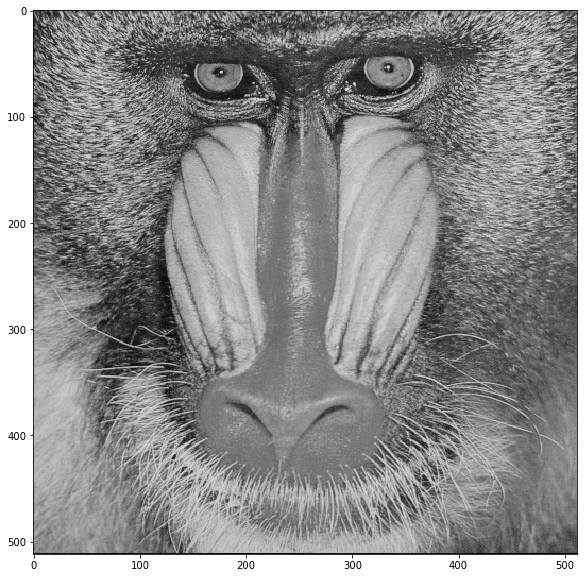

In [8]:
from PIL import Image, ImageTk
%matplotlib inline

mandrill = Image.open("mandrill.png").convert('L')
mandrill = np.array(mandrill)
plt.figure(figsize=(10,10))
plt.imshow(mandrill, cmap='gray', interpolation='nearest', vmin=0, vmax=255)


La dimensión de la imagen es:

In [9]:
print (str(mandrill.shape[0]) +  " por " + str(mandrill.shape[1]) + " pixeles.")

512 por 512 pixeles.


A continuación se le entragará como parametro a nuestro solver Resolver_Ecuacion_Calor la matriz generada a través de la imagen como matriz inicial para resolverlo como una ecuación de calor.

In [10]:
Resolver_Ecuacion_Calor(mandrill, 0.5, 1, 0.25, 1, 5)

array([[[ 145.        ,   55.        ,   48.        , ...,  112.        ,
          153.        ,  177.        ],
        [ 116.        ,  101.        ,   39.        , ...,  129.        ,
          148.        ,  125.        ],
        [  76.        ,  113.        ,   46.        , ...,  100.        ,
           88.        ,   81.        ],
        ..., 
        [ 140.        ,  145.        ,  140.        , ...,   82.        ,
           89.        ,   78.        ],
        [ 156.        ,  140.        ,  131.        , ...,   78.        ,
           79.        ,   68.        ],
        [  10.        ,   11.        ,   13.        , ...,    6.        ,
            3.        ,    4.        ]],

       [[  20.1875    ,   40.375     ,   32.75      , ...,   60.125     ,
           61.875     ,   -0.        ],
        [  40.375     ,   80.75      ,   65.5       , ...,  120.25      ,
          123.75      ,   -0.        ],
        [  44.75      ,   89.5       ,   73.25      , ...,   96.75      

Ahora graficaremos la imagen con un $T_{max} = 30$, $dt = 0.25$ y $\alpha = 1$

In [15]:
def graficar_Mandrill(t, C):
    plt.figure(figsize=(10,10))
    plt.imshow(Resolver_Ecuacion_Calor(mandrill,C,1,0.25,1,t)[t], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    plt.show()
interact(graficar_Mandrill, C = widgets.FloatSlider(min=0.1,max=0.99,step=0.1,value=0.5), t = widgets.IntSlider(min=0,max=30,step=1,value=1))

<function __main__.graficar_Mandrill>

Aquí se puede apreciar como a medida que se avanza el tiempo la imagen se va volviendo más y más borrosa.

<h3> Pregunta 3 </h3>

Al igual que en la pregunta anterior lo primero que se hará será abrir la imagen pero esta vez lo llevaremos a la función entregada para mostrarla junto al histograma.

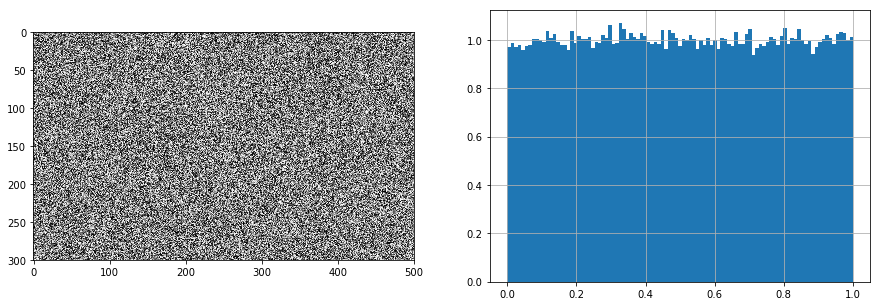

In [16]:
# Bibliotecas para el ejemplo
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
%matplotlib inline

# Imagen (en su caso, debe ser la imagen adjunta)
blurred_image = np.random.rand(300, 500)

# Función auxiliar para mostrar la imagen y el histograma. Los parámetros k y dt son entregados por el slide.
#  im: imagen a mostrar.
def show_imhist(im):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)
    
    plt.show()

show_imhist(blurred_image)

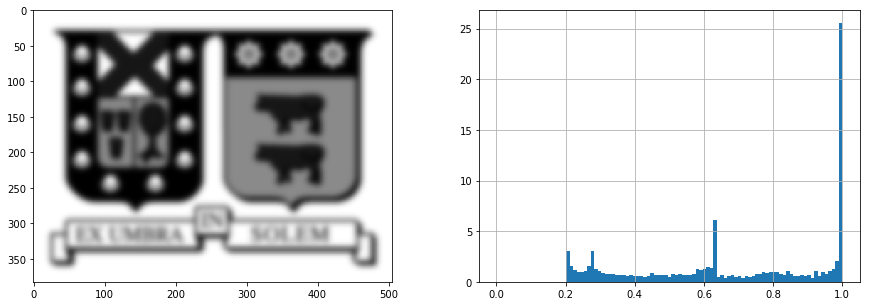

In [17]:
blurred = Image.open("blurred.tiff")
blurred = np.array(blurred)
show_imhist(blurred)

Ahora para lograr llevar nuestra matriz al solver de Resolver_Ecuacion_Calor se necesita modificar para que se ajuste al tamaño de esta imagen que no es cuadrada como la del mandrill.

In [18]:
def Resolver_Ecuacion_Calor_No_Cuadrada(matriz_inicial, C, alpha, delta_k, delta_h, t):
    matriz_pivote = matriz_inicial
    matriz = np.zeros((len(matriz_inicial),len(matriz_inicial[0])))
    sigma = (alpha*delta_k)/(delta_h**2)
    omega = (C - 1)/C
    tiempo = t/delta_k
    matrices_totales = np.zeros((int(tiempo) + 1, len(matriz_inicial), len(matriz_inicial[0])))
    matrices_totales[0] = matriz_inicial
    for k in range(1, int(tiempo) + 1):
        
        #valores interiores
        for i in range(1, len(matriz_inicial)-1):
            for j in range(1, len(matriz_inicial[0])-1):
                matriz[i][j] = sigma*matriz_pivote[i + 1][j] + sigma*matriz_pivote[i - 1][j] + (1 -4*sigma)*matriz_pivote[i][j] + sigma*matriz_pivote[i][j + 1] + sigma*matriz_pivote[i][j - 1]
        
        #valores frontera sin esquina
        for i in range(len(matriz_inicial)):
            for j in range(len(matriz_inicial[0])):
                if(i == 0 and j != 0 and j != len(matriz_inicial[0]) - 1):
                    matriz[i][j] = matriz[i + 1][j]*(omega/(omega - 1))
                    
                elif(i == len(matriz_inicial) - 1 and j != 0 and j != len(matriz_inicial[0]) - 1):
                    matriz[i][j] = matriz[i - 1][j]*((omega + 1)/omega)
                    
                elif(j == 0 and i != 0 and i != len(matriz_inicial) - 1):
                    matriz[i][j] = matriz[i][j + 1]*((omega)/(omega - 1))
                    
                elif(j == len(matriz_inicial[0]) - 1 and i != 0 and i != len(matriz_inicial) - 1):
                    matriz[i][j] = matriz[i][j - 1]*((omega + 1)/omega)
        
        #valores esquinas
        matriz[0][0] = matriz[1][0]*((omega/(omega - 1)))
        matriz[0][len(matriz_inicial[0]) - 1] = matriz[1][len(matriz_inicial[0]) - 1]*((omega/(omega - 1)))
        matriz[len(matriz_inicial) - 1][0] = matriz[len(matriz_inicial) - 1 - 1][0]*((omega + 1)/omega)
        matriz[len(matriz_inicial) - 1][len(matriz_inicial[0]) - 1] =matriz[len(matriz_inicial) - 1 - 1][len(matriz_inicial[0]) - 1]*((omega + 1)/omega)
        
        
        matriz_pivote = matriz
        matrices_totales[k] = matriz_pivote
    
    return matrices_totales
 

Ahora que ya está modificada la función se procede a graficar, solo que esta vez se utilizará $\alpha = -1$, esto se debe a que se quiere resolver de forma inversa en cuanto al tiempo.

In [20]:
def graficar_Blurred(C, t):
    show_imhist(Resolver_Ecuacion_Calor_No_Cuadrada(blurred,C,-1,0.25,1,t)[t])
    
interact(graficar_Blurred, C = widgets.FloatSlider(min=0.1,max=0.99,step=0.1,value=0.5), t = widgets.IntSlider(min=0,max=100,step=1,value=1))

<function __main__.graficar_Blurred>


En este caso podemos ver como al avanzar el tiempo la imagen comienza a desaparecer hasta finalmente ya no poder verla más. Esto mismo pasa con el histograma, la distribución que se tenía al comienzo con menos tiempo ya no se logra distinguir. Se pueden asociar estos dos puntos, a medida que el histograma se va desordenando la imagen va desapareciendo.
Respecto a $\Delta t$ a medida que va creciendo los resultador mejoran pero llegando a un punto donde no se permite ver bien la imagen.

<h2> Conclusiones </h2>

En este laboratorio se logró resolver un problema de tres dimensiones, dos espaciales y una de tiempo utilizando el metódo de diferencias finitas. Se resolvió un problema de ecuación de calor, resolviéndolo utilizando el método mencionado anteriormente. Este mismo derivó al procesamiento de imágenes donde se analizó que modificaba en esta los diferentes parámetros.